In [35]:
import krakenex
k = krakenex.API()
import numpy as np
from time import sleep

import matplotlib.pyplot as plt
%matplotlib inline

from backtest import Trader
from algorithms import SMA, EMA, MovingAverageAlgo




In [30]:
eur_tickers = []
gbp_tickers = []
usd_tickers = []
pairs = k.query_public('AssetPairs')
for key in pairs['result']:
    if '.d' in key:
        continue
    if 'EUR' in key:
        eur_tickers.append(key)
        print(key)
    if 'GBP' in key:
        gbp_tickers.append(key)
        print(key)
    if 'USD' in key:
        usd_tickers.append(key)
        print(key)

print('{} EUR, {} GBP, {} USD Trading pairs'.format(len(eur_tickers), len(gbp_tickers), len(usd_tickers)))

BCHEUR
BCHUSD
DASHEUR
DASHUSD
USDTZUSD
XETCZEUR
XETCZUSD
XETHZEUR
XETHZGBP
XETHZUSD
XLTCZEUR
XLTCZUSD
XREPZEUR
XXBTZEUR
XXBTZGBP
XXBTZUSD
XXMRZEUR
XXMRZUSD
XXRPZEUR
XXRPZUSD
XZECZEUR
XZECZUSD
10 EUR, 2 GBP, 10 USD Trading pairs


In [31]:
k.query_public('Ticker', {'pair':','.join(eur_tickers)})

{'error': [],
 'result': {'BCHEUR': {'a': ['1212.100000', '1', '1.000'],
   'b': ['1206.900000', '1', '1.000'],
   'c': ['1210.500000', '0.00823000'],
   'h': ['1222.500000', '1309.700000'],
   'l': ['1120.000000', '1120.000000'],
   'o': '1170.700000',
   'p': ['1169.929353', '1202.669508'],
   't': [5934, 13550],
   'v': ['2091.16748005', '4858.36462143']},
  'DASHEUR': {'a': ['556.542000', '1', '1.000'],
   'b': ['555.108000', '2', '2.000'],
   'c': ['556.542000', '0.01443556'],
   'h': ['559.987000', '607.980000'],
   'l': ['520.000000', '520.000000'],
   'o': '541.136000',
   'p': ['537.074105', '559.542234'],
   't': [2392, 6515],
   'v': ['1593.89290517', '4971.55634566']},
  'XETCZEUR': {'a': ['22.45800000', '1', '1.000'],
   'b': ['22.38900000', '3', '3.000'],
   'c': ['22.36600000', '140.49189359'],
   'h': ['22.74200000', '24.39900000'],
   'l': ['20.60400000', '20.60400000'],
   'o': '21.50100000',
   'p': ['21.92703533', '22.15669878'],
   't': [5350, 13110],
   'v': ['720

BCHEUR
DASHEUR
XETCZEUR
XETHZEUR
XLTCZEUR
XREPZEUR
XXBTZEUR
XXMRZEUR
XXRPZEUR
XZECZEUR


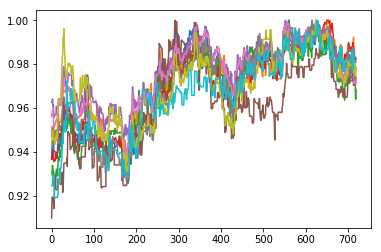

In [39]:
price_map = {}
for ticker in eur_tickers:
    print(ticker)
    prices = []
    ohlc = k.query_public('OHLC', {'pair':ticker, 'interval':1})
    if 'result' not in ohlc:
        print(ohlc)
    else:
        for items in ohlc['result'][ticker]:
            prices.append(float(items[4]))
        prices /= np.max(prices)
        plt.plot(prices)
        price_map[ticker] = prices
    sleep(0.5)

In [41]:
fast = 2
slow = 250

for ticker in eur_tickers:
    fast_avg = SMA(fast)
    slow_avg = SMA(slow)
    last_price = 0
    slow_val = 0
    fast_val = 0
    for price in price_map[ticker]:
        fast_val = fast_avg.tick(price)
        slow_val = slow_avg.tick(price)
    print('{}: {}'.format(ticker, (fast_val - slow_val / slow_val )))


BCHEUR: -0.021739130434783482
DASHEUR: -0.018981068932941825
XETCZEUR: -0.033908374774456185
XETHZEUR: -0.017385984427140122
XLTCZEUR: -0.02701591809281756
XREPZEUR: -0.023350877192981456
XXBTZEUR: -0.028921686746988584
XXMRZEUR: -0.026402495277423776
XXRPZEUR: -0.023468271334792457
XZECZEUR: -0.018930504709158136
